# Precision-Recall metric to evaluate classifier output quality.

In information retrieval, **precision** is a measure of result relevancy, while **recall** is a measure of how many truly relevant results are returned. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

**Precision** is defined as the number of true positives over the number of true positives plus the number of false positives.

$$P = \frac{T_p}{T_p+F_p}$$.

**Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives.

$$R = \frac{T_p}{T_p + F_n}$$

These quantities are also related to the score, which is defined as the harmonic mean of precision and recall.

$$F1 = 2\frac{P \times R}{P+R}$$

It is important to note that the precision may not decrease with recall. The definition of precision shows that lowering the threshold of a classifier may increase the denominator, by increasing the number of results returned. If the threshold was previously set too high, the new results may all be true positives, which will increase precision. If the previous threshold was about right or too low, further lowering the threshold
will introduce false positives, decreasing precision.

Recall is defined as:

$$\frac{T_p}{T_p+F_n}$$

where

$$T_p+F_n$$

does not depend on the classifier threshold. This means that lowering the classifier threshold may increase recall, by increasing the number of true positive results. It is also possible that lowering the threshold may leave recall unchanged, while the precision fluctuates.

The relationship between recall and precision can be observed in the stairstep area of the plot - at the edges of these steps a small change in the threshold considerably reduces precision, with only a minor gain in recall. See the corner at recall = 0.59, precision = 0.80 for an example of this phenomenon.

Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend Precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to binarize the output. One curve can be drawn per label, but one can also draw a precision-recall curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target

In [2]:
from sklearn.preprocessing import label_binarize

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

In [3]:
import numpy as np

#RandomState = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, RandomState.randn(n_samples, 200 * n_features)]

In [4]:
from sklearn.cross_validation import train_test_split

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear',
                                    probability = True), n_jobs=-1)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Compute Precision-Recall and plot curve

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

Compute micro-average ROC curve and ROC area

In [7]:
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

Plot Precision-Recall curve

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


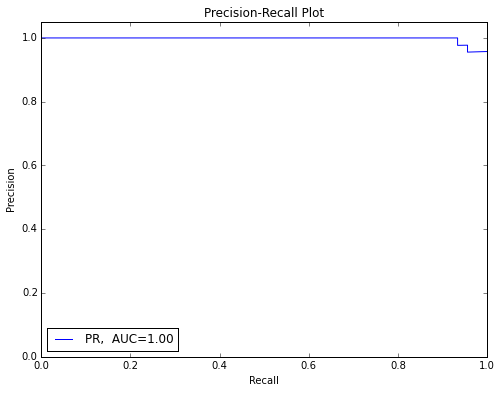

In [9]:
plt.figure(num = None,
       figsize = (8,6),
           dpi = 80,
     facecolor = 'w',
     edgecolor = 'k')

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.00])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Plot')

plt.plot(recall[0], precision[0], label='PR,  AUC={0:0.2f}'.format(average_precision[0]))

plt.legend(loc="lower left")
plt.show()

Plot Precision-Recall curve for each class

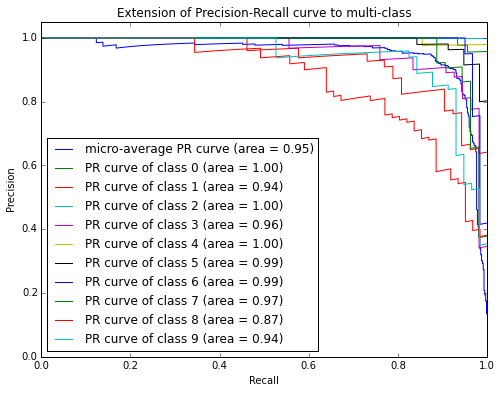

In [19]:
plt.figure(num = None,
       figsize = (8,6),
           dpi = 80,
     facecolor = 'w',
     edgecolor = 'k')

plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')

plt.plot(recall["micro"], precision["micro"],
         label='micro-average PR curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))

for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='PR curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.legend(loc="lower left")
plt.show()